# `IPL Capstone Project`

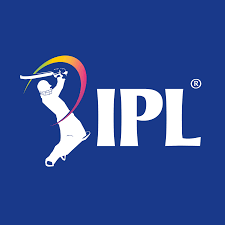

### Importing Libraries and Default Setting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Dataset Info

In [2]:
df = pd.read_csv(r"..\datasets\IPL.csv")
df.sample(5)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
11,12,"April 4,2022","Dr DY Patil Sports Academy, Mumbai",Hyderabad,Lucknow,Group,Hyderabad,Field,169,7,157,9,Lucknow,Runs,12,Avesh Khan,KL Rahul,68,Avesh Khan,4--24
6,7,"March 31,2022","Brabourne Stadium, Mumbai",Chennai,Lucknow,Group,Lucknow,Field,210,7,211,4,Lucknow,Wickets,6,Evin Lewis,Quinton de Kock,61,Ravi Bishnoi,2--24
35,36,"April 23,2022","Brabourne Stadium, Mumbai",Banglore,Hyderabad,Group,Hyderabad,Field,68,10,72,1,Hyderabad,Wickets,9,Marco Jansen,Abhishek Sharma,47,T Natarajan,3--10
49,50,"May 5,2022","Brabourne Stadium, Mumbai",Delhi,Hyderabad,Group,Hyderabad,Field,207,3,186,8,Delhi,Runs,21,David Warner,David Warner,92,Khaleel Ahmed,3--30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [4]:
print(f"Rows = {df.shape[0]} | Columns = {df.shape[1]}")

Rows = 74 | Columns = 20


In [5]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

## Analysis

**⚡1. Most Match Winner**

In [6]:
match_wins = df['match_winner'].value_counts()
match_wins

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

<Axes: ylabel='match_winner'>

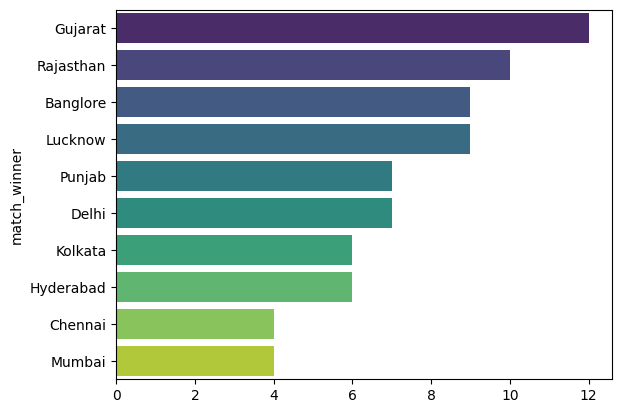

In [7]:

sns.barplot(y=match_wins.index, x=match_wins.values,palette='viridis')

**⚡2. Toss Decision Trend**

<Axes: xlabel='toss_decision', ylabel='count'>

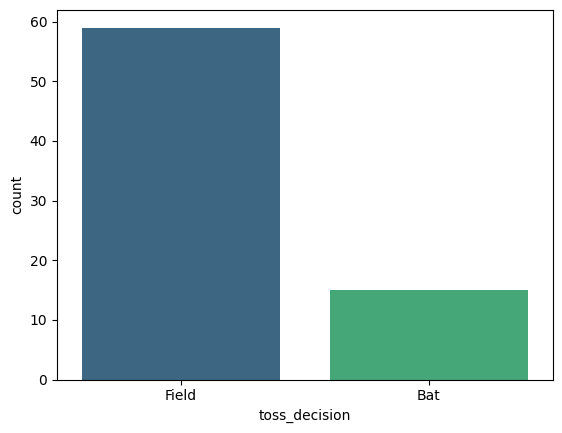

In [8]:
sns.countplot(x=df['toss_decision'],palette='viridis')

**⚡3. Toss Winner VS Match Winner**

In [9]:
count_tw_mw = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = count_tw_mw * 100 / df.shape[0]
print(f"Winning Chance = {percentage.round(2)}")

Winning Chance = 48.65


**⚡4. How team wins - Run or Wicket**

In [10]:
df['won_by'].value_counts()

won_by
Wickets    37
Runs       37
Name: count, dtype: int64

<Axes: title={'center': 'Won By Wicket vs Runs'}, xlabel='won_by', ylabel='count'>

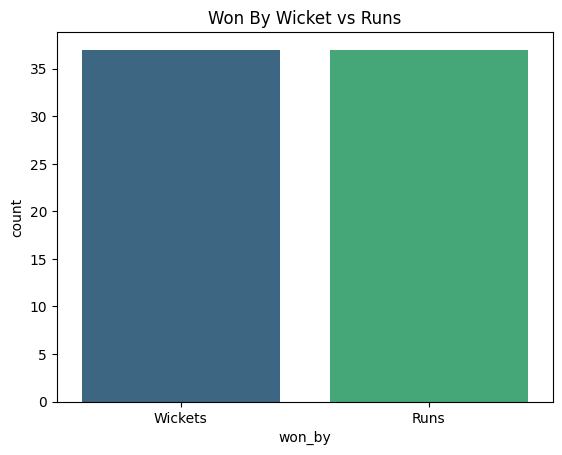

In [11]:
plt.title("Won By Wicket vs Runs")
sns.countplot(x=df['won_by'],palette='viridis')

**⚡5. Player of the Match**

<Axes: ylabel='player_of_the_match'>

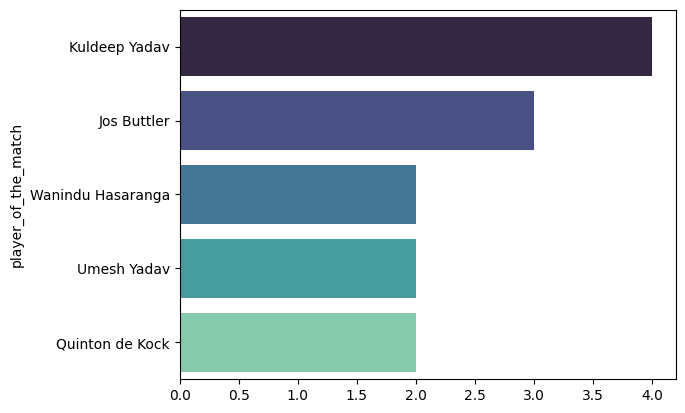

In [12]:

arr = df['player_of_the_match'].value_counts().head()
sns.barplot(y= arr.index, x = arr.values,palette='mako')


⚡**6. 2 Top Scorer**

In [13]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [14]:
df['top_scorer'].value_counts().head(2)

top_scorer
Jos Buttler        7
Quinton de Kock    5
Name: count, dtype: int64

In [15]:
high = df.groupby('top_scorer')['highscore'].agg(['sum','mean']).sort_values(by='sum',ascending=False).head(2)
high

,sum,mean
top_scorer,,
Jos Buttler,651,93.0
Quinton de Kock,377,75.4


<Axes: xlabel='top_scorer', ylabel='sum'>

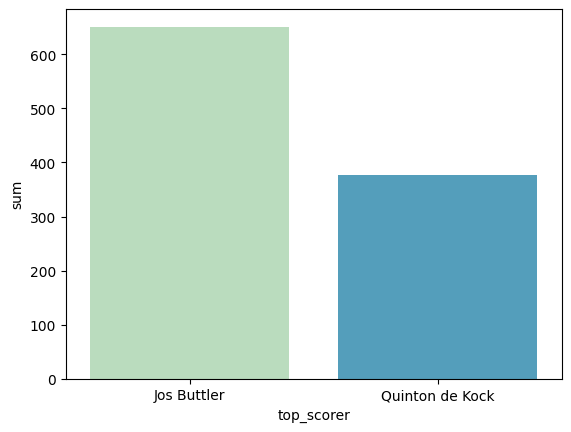

In [16]:
sns.barplot(x = high.index , y = high['sum'],palette='GnBu')

**⚡7. 10 Best Bowling Figure**

In [17]:
# Data Extraction on best bowling figure 

#new col - Wicket_Figure
df['wicket_figure'] = df['best_bowling_figure'].apply(lambda x : int(x[0]))

In [18]:
data = df.groupby('best_bowling')['wicket_figure'].sum().sort_values(ascending=False).head(10)
data

best_bowling
Yuzvendra Chahal     17
Jasprit Bumrah       11
Kuldeep Yadav        11
Rashid Khan          11
Josh Hazlewood       10
Kagiso Rabada        10
Avesh Khan           10
Umran Malik           9
Wanindu Hasaranga     9
T Natarajan           8
Name: wicket_figure, dtype: int64

<Axes: ylabel='best_bowling'>

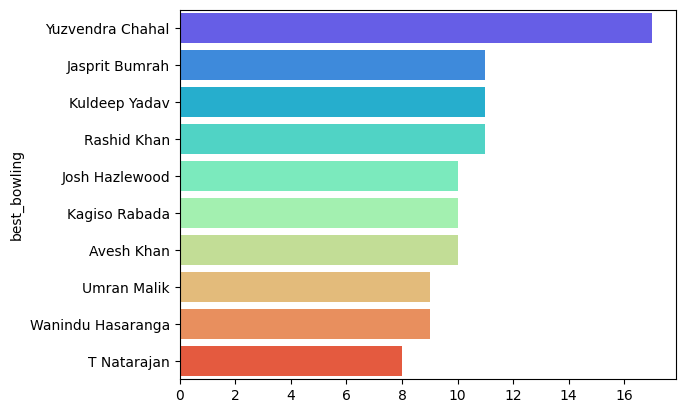

In [19]:
sns.barplot( x = data.values, y = data.index,palette='rainbow')

**⚡8. Most match played - venue**

<Axes: ylabel='venue'>

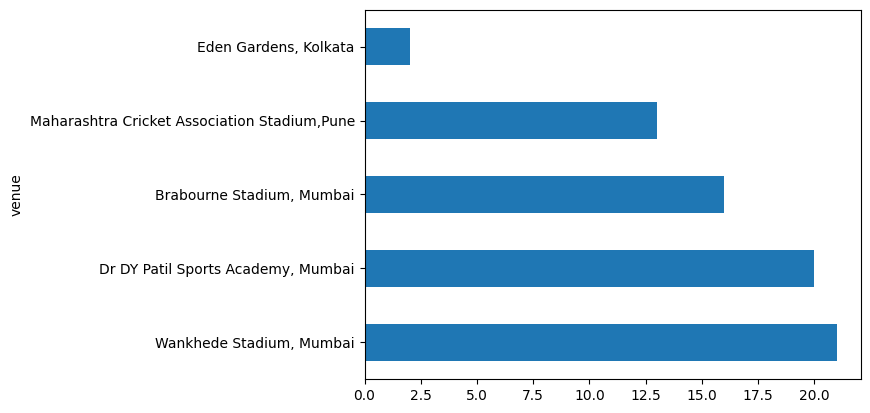

In [20]:
ven = df['venue'].value_counts().head()
ven.plot(kind='barh')

**⚡9. Who won the highest margin by RUNS**

In [21]:
df[df['won_by'] == 'Runs'].sort_values(by='margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


**⚡10. Highest Individual Score in a match**

In [22]:
df[df['highscore'] == df['highscore'].max()][['player_of_the_match','highscore','stage']]

,player_of_the_match,highscore,stage
65,Quinton de Kock,140,Group


**⚡11. Best Bowling figure in a match**

In [23]:
df['low_run_figure'] = df['best_bowling_figure'].apply(lambda x : int(x[-2:]))

In [24]:
best_bowler = df.sort_values(by=['wicket_figure','low_run_figure'],ascending=[False,True]).head()
best_bowler['best_bowling']

55       Jasprit Bumrah
53    Wanindu Hasaranga
39          Umran Malik
29     Yuzvendra Chahal
34        Andre Russell
Name: best_bowling, dtype: object

<Axes: xlabel='low_run_figure', ylabel='best_bowling'>

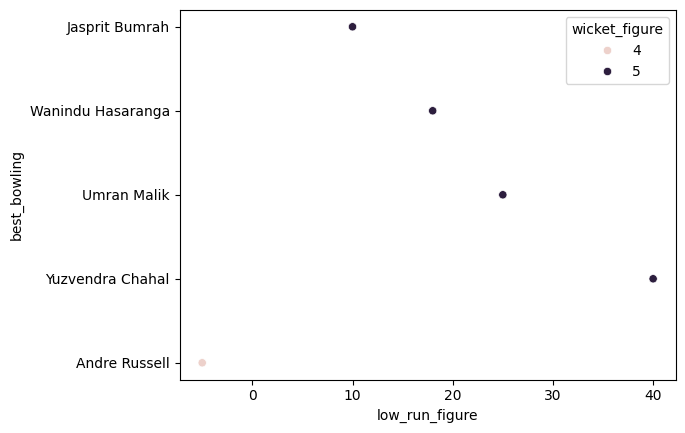

In [25]:

sns.scatterplot(data= best_bowler, y = 'best_bowling', hue = 'wicket_figure',x='low_run_figure')